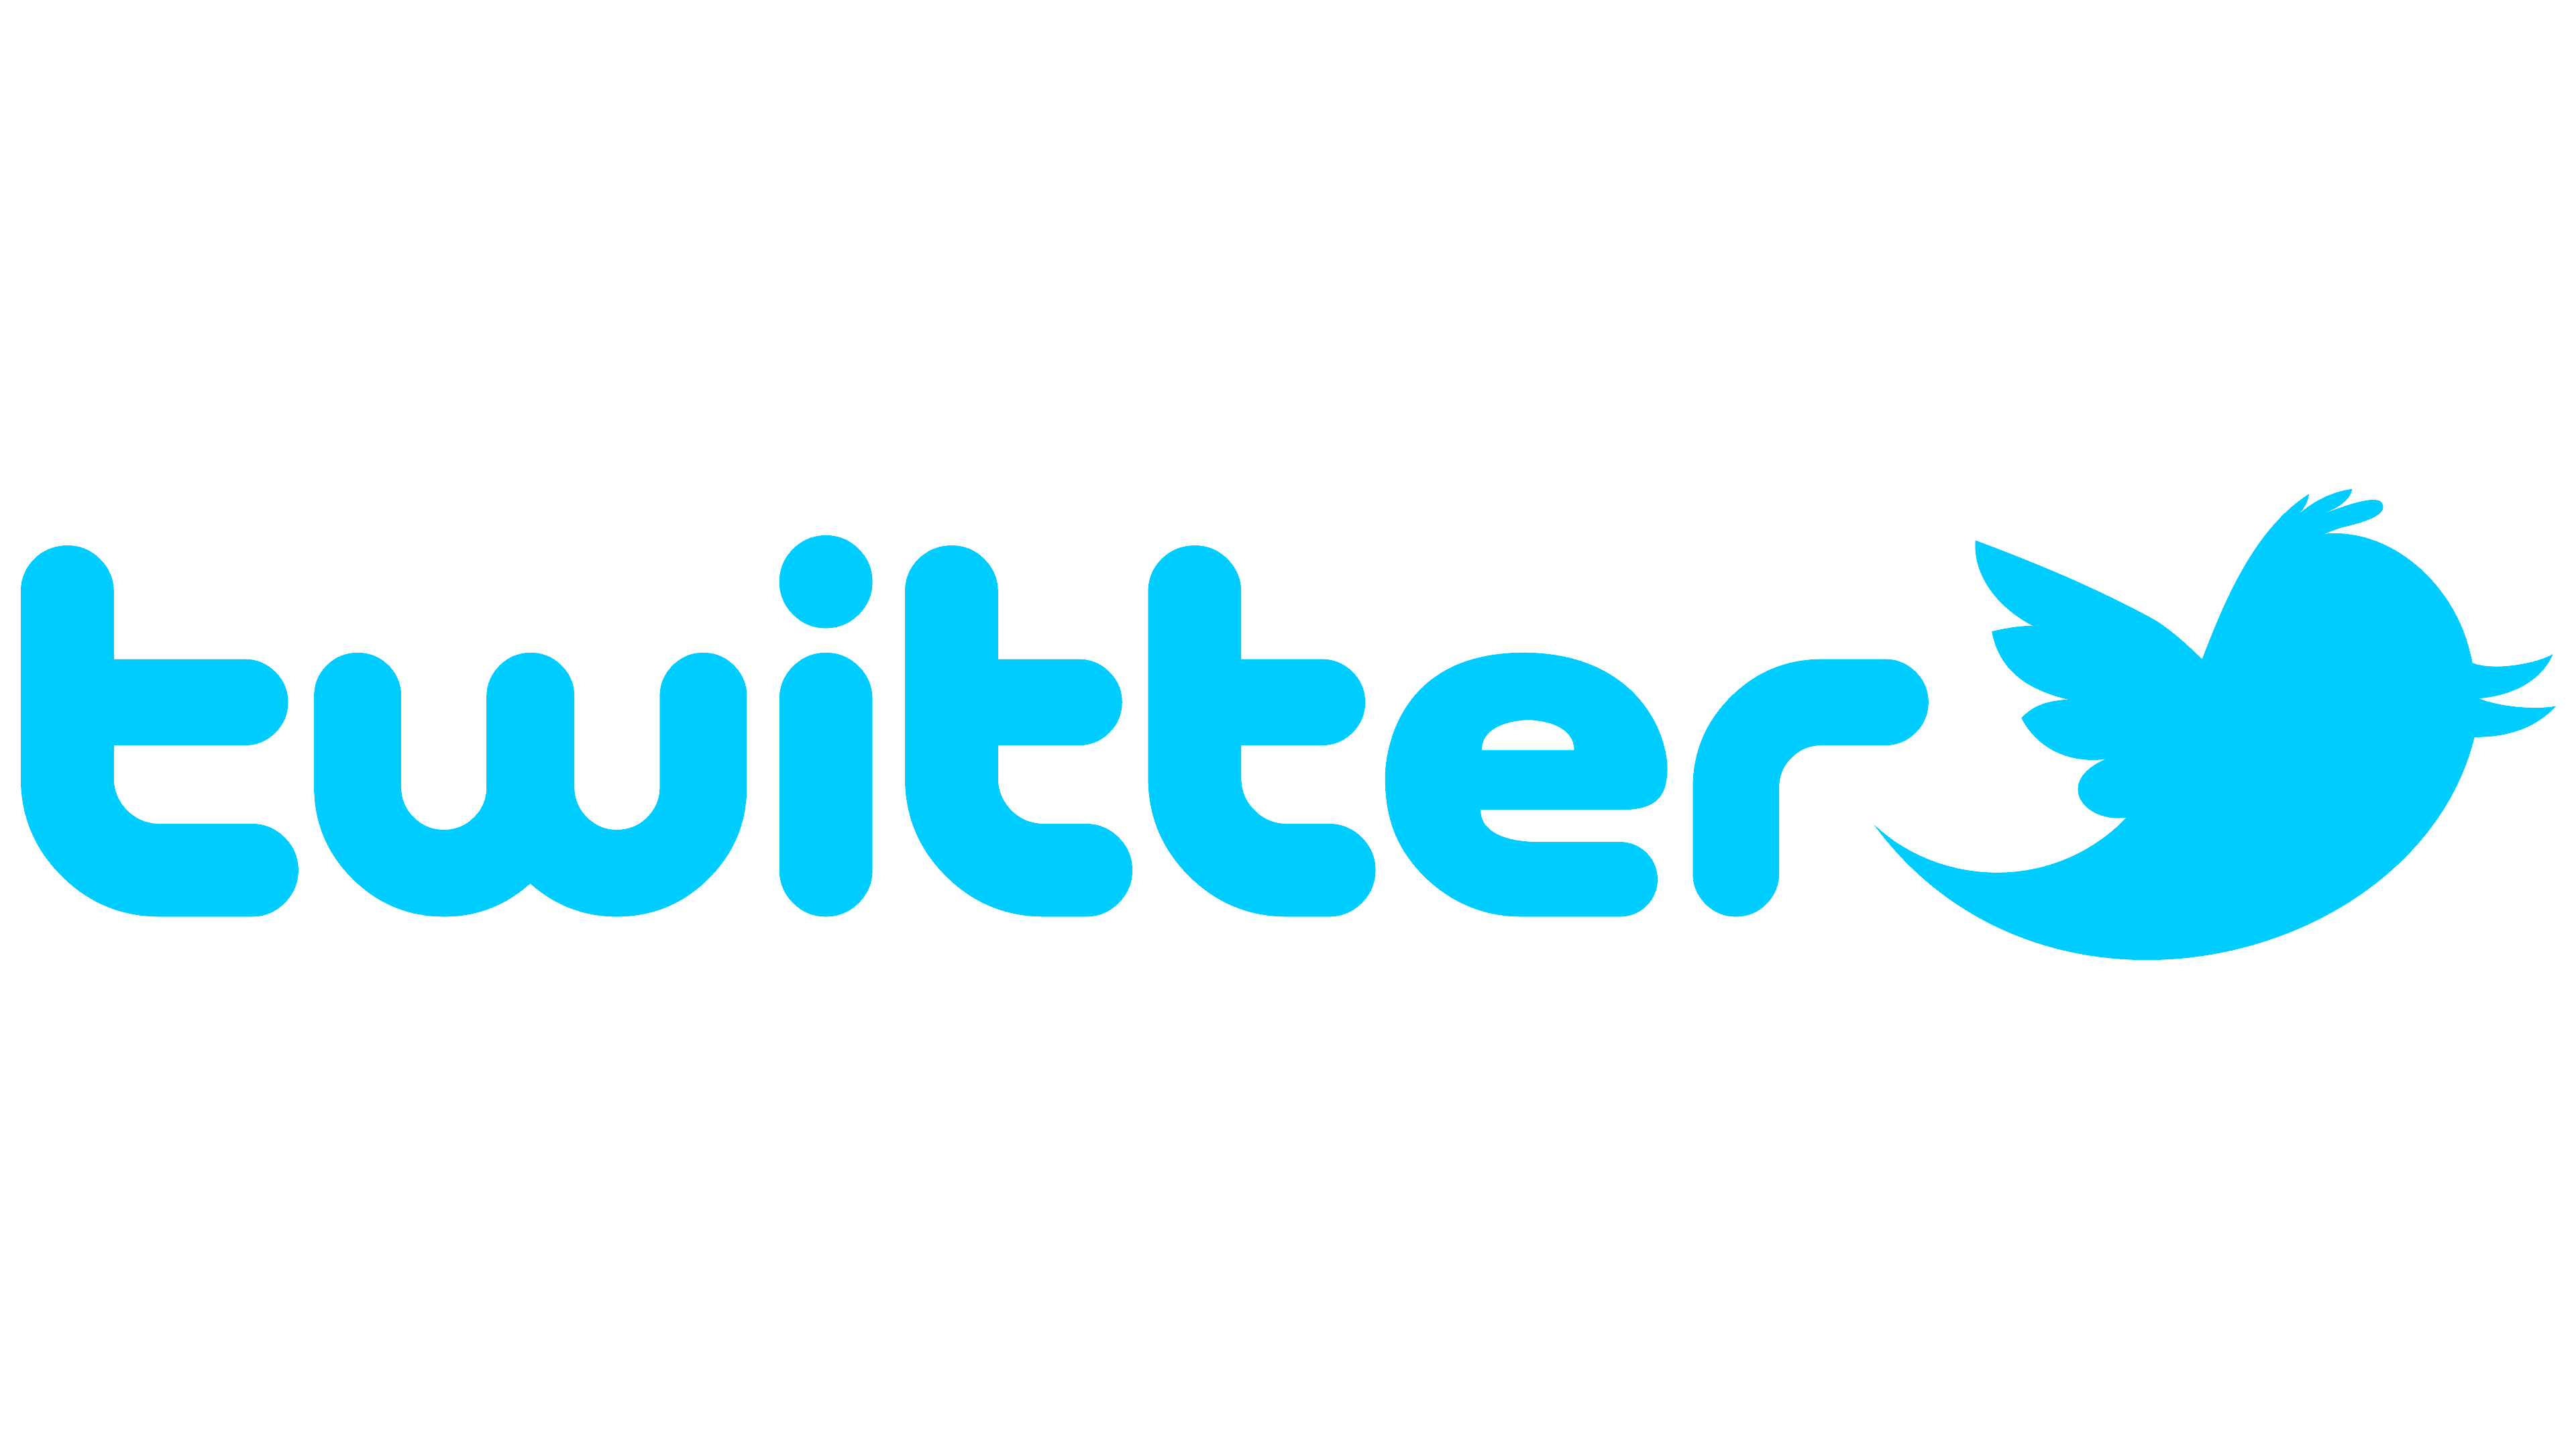

## **Extraire les tweets sur le Ramadan 🌙 peut inspirer la diversité culturelle 🌍, favoriser la compréhension mutuelle 🤝, partager l'inspiration spirituelle 🙏, et renforcer les liens communautaires 💬**



> ### Etapes à suivre ✅




**Récupération des tweets :**
Utilisation d'une fonction asynchrone display_tweets() pour récupérer les tweets à partir d'un scraper Twitter asynchrone.

**Affichage des tweets :**
Les tweets sont affichés à l'écran pendant le processus de récupération.

**Enregistrement des tweets :**

Les données des tweets sont enregistrées dans un fichier CSV ou JSON selon votre choix.

Le format de sortie est déterminé par la variable OUTPUT_FORMAT.



> ### Le code source d'extraction 🔽



In [ ]:
pip install twscrape

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.3 MB/s eta 0:00:00


#QUERIES ::
  رمضان المغرب

  رمضان_مبارك

  إفطار_صائم

  رمضان سحور

   إفطار المغرب

سحور المغرب رمضان

تراويح المغرب

صدقة رمضان المغرب

وصفات رمضان المغرب

أطباق رمضان المغربية

رمضان كريم المغرب

رمضان مبارك المغرب

In [ ]:
import asyncio
import twscrape
from twscrape import API, gather
import pandas as pd

class TwitterScraper:
    def __init__(self):
        self.api = API()

    async def gather_tweets(self, query="رمضان", limit=20):
        await self.api.pool.add_account("username dial twitter", "password", "email","mail_pass") #mail pass optionel  , we can have more than 1
        await self.api.pool.login_all()

        tweets = await gather(self.api.search(query, limit=limit))

        data = []
        for tweet in tweets:
            tweet_data = {
                'ID': tweet.id,
                'Username': tweet.user.username,
                'Content': tweet.rawContent,
                'Date': tweet.date
            }
            data.append(tweet_data)

            print(tweet.id, tweet.user.username, tweet.rawContent)

        df = pd.DataFrame(data)
        return df

In [ ]:

async def display_tweets():
    scraper = TwitterScraper()
    df = await scraper.gather_tweets()

    # Afficher les tweets un par un
    for index, row in df.iterrows():
        print(f"Tweet ID: {row['ID']}")
        print(f"Username: {row['Username']}")
        print(f"Content: {row['Content']}")
        print(f"Date: {row['Date']}")
        print("\n")

# Si une boucle d'événements est déjà en cours d'exécution, ajoutez display_tweets() à cette boucle
if asyncio.get_event_loop().is_running():
    asyncio.create_task(display_tweets())
else:
    asyncio.run(display_tweets())

2024-04-05 18:41:32.454 | INFO     | twscrape.db:migrate:92 - Running migration to v1
2024-04-05 18:41:32.473 | INFO     | twscrape.db:migrate:92 - Running migration to v2
2024-04-05 18:41:32.495 | INFO     | twscrape.db:migrate:92 - Running migration to v3
2024-04-05 18:41:32.520 | INFO     | twscrape.accounts_pool:add_account:97 - Account username dial twitter added successfully (active=False)
2024-04-05 18:41:32.526 | INFO     | twscrape.accounts_pool:login_all:166 - [1/1] Logging in username dial twitter - email


### l'enregitrement des donnees dans un fichier csv



In [ ]:
import csv
import asyncio

async def display_tweets():
    scraper = TwitterScraper()
    df = await scraper.gather_tweets()

    with open("tweets.csv", "w", newline="", encoding="utf-8") as csv_file: # encodage utf8
        writer = csv.DictWriter(csv_file, fieldnames=["ID", "Username", "Content", "Date"])
        writer.writeheader()

        for index, row in df.iterrows():
            writer.writerow({
                "ID": row['ID'],
                "Username": row['Username'],
                "Content": row['Content'],
                "Date": row['Date']
            })

    print("Les données ont été enregistrées dans tweets.csv.")

if asyncio.get_event_loop().is_running():
    asyncio.create_task(display_tweets())
else:
    asyncio.run(display_tweets())


2024-04-05 18:41:36.941 | WARNING  | twscrape.accounts_pool:add_account:76 - Account username dial twitter already exists
2024-04-05 18:41:36.949 | INFO     | twscrape.accounts_pool:login_all:166 - [1/1] Logging in username dial twitter - email
